# Neural Networks Implementation

### PreProcess Data

In [32]:
import SL_API as pre
import imp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve, auc
imp.reload(pre)
X_test, y_test, X_train_split, y_train_split, X_valid, y_valid, X_train, y_train = pre.PreProcessData()
modelAnalyzer = pre.ModelAnalysis()

### Class Construction

In [2]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.biases_input_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.biases_hidden_output = np.zeros((1, output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        sig = self.sigmoid(x)
        return sig * (1 - sig)

    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        return np.where(x >= 0, 1, 0)

    def feedforward(self, X):
        # Input to hidden layer
        self.hidden_sum = np.dot(X, self.weights_input_hidden) + self.biases_input_hidden
        # self.hidden_activation = self.relu(self.hidden_sum)
        self.hidden_activation = self.sigmoid(self.hidden_sum)

        # Hidden to output layer
        self.output_sum = np.dot(self.hidden_activation, self.weights_hidden_output) + self.biases_hidden_output
        self.output_activation = self.sigmoid(self.output_sum)

        return self.output_activation

    def backward(self, X, y, output):
        # Output layer
        error_output = y - output
        delta_output = error_output * self.sigmoid_derivative(output)

        # Hidden layer
        error_hidden = error_output.dot(self.weights_hidden_output.T)
        # delta_hidden = error_hidden * self.relu_derivative(output)
        delta_hidden = error_hidden * self.sigmoid_derivative(self.hidden_activation)

        # Update weights and biases
        self.weights_hidden_output += self.hidden_activation.T.dot(delta_output) * self.learning_rate
        self.biases_hidden_output += np.sum(delta_output, axis=0, keepdims=True) * self.learning_rate
        self.weights_input_hidden += X.T.dot(delta_hidden) * self.learning_rate
        self.biases_input_hidden += np.sum(delta_hidden, axis=0, keepdims=True) * self.learning_rate

    def train(self, X, y, epochs):
        y = y.reshape(-1,1)
        for epoch in range(epochs):
            # Forward pass
            output = self.feedforward(X)

            # Backpropagation
            self.backward(X, y, output)

            # Print loss every 100 epochs
            if (epoch + 1) % 100 == 0:
                loss = -(y * np.log(output) + (1 - y) * np.log(1 - output))
                loss = np.mean(loss)
                # loss = np.mean((output - y) ** 2)
                print(f'Epoch {epoch + 1}, Loss: {loss:.4f}')
                # print(f'Epoch {epoch + 1}, Loss: {loss}')

    def predict(self, X):
        return self.feedforward(X)


### 1 Neuron Model Construction

Epoch 100, Loss: 0.5759
Epoch 200, Loss: 0.5729
Epoch 300, Loss: 0.5727
Epoch 400, Loss: 0.5731


/tmp/ipykernel_2452940/1769104611.py:15: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch 500, Loss: 0.5734
Epoch 600, Loss: 0.5740
Epoch 700, Loss: 0.5744
Epoch 800, Loss: 0.5745
Epoch 900, Loss: 0.5745
Epoch 1000, Loss: 0.5745

Accuracy: 0.6749496306245802
F1 Score: 0.7004950495049505
Precision: 0.8549848942598187
NPV: 0.5308343409915357
Recall: 0.5932914046121593
Specificity: 0.8205607476635514


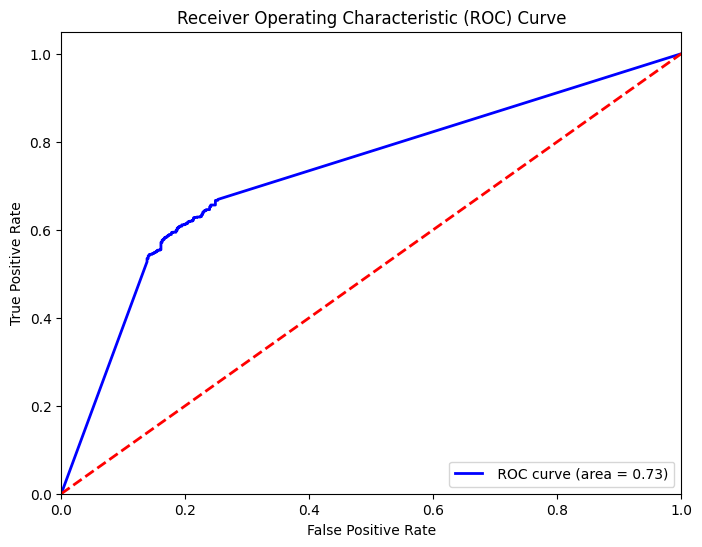

In [5]:
# Create and train the neural network
input_size = X_train.shape[1]
hidden_size = 1 # Number of neurons in the hidden layer
output_size = 1
learning_rate = 0.001
epochs = 1000

model1 = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)
model1.train(np.array(X_train), np.array(y_train), epochs)
predictions1 = np.array(model1.predict(X_valid))
print()
modelAnalyzer.printPrediction(predictions1, y_valid)
modelAnalyzer.plot_roc_auc(predictions1, y_valid)

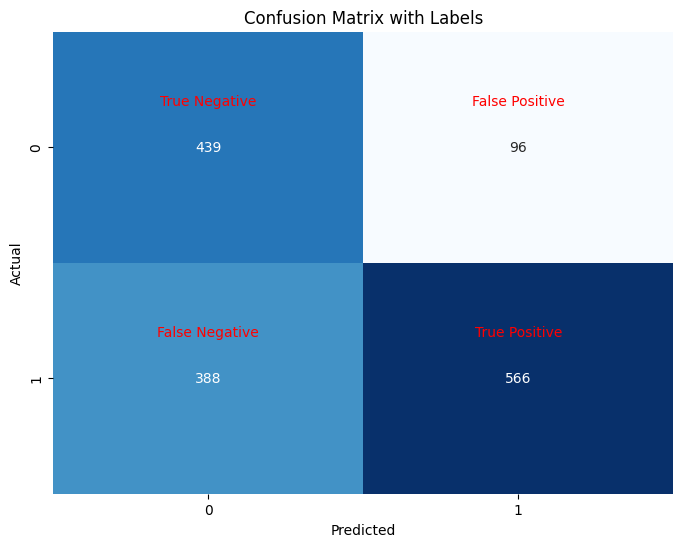

In [6]:
modelAnalyzer.plot(predictions1, y_valid)

### 4 Neuron Model Construction

Epoch 100, Loss: 0.5418
Epoch 200, Loss: 0.5423
Epoch 300, Loss: 0.5447
Epoch 400, Loss: 0.5453
Epoch 500, Loss: 0.5484
Epoch 600, Loss: 0.5518
Epoch 700, Loss: 0.5545
Epoch 800, Loss: 0.5561
Epoch 900, Loss: 0.5571
Epoch 1000, Loss: 0.5579

Accuracy: 0.7031564808596373
F1 Score: 0.7480045610034208
Precision: 0.82
NPV: 0.5674891146589259
Recall: 0.6876310272536688
Specificity: 0.7308411214953271


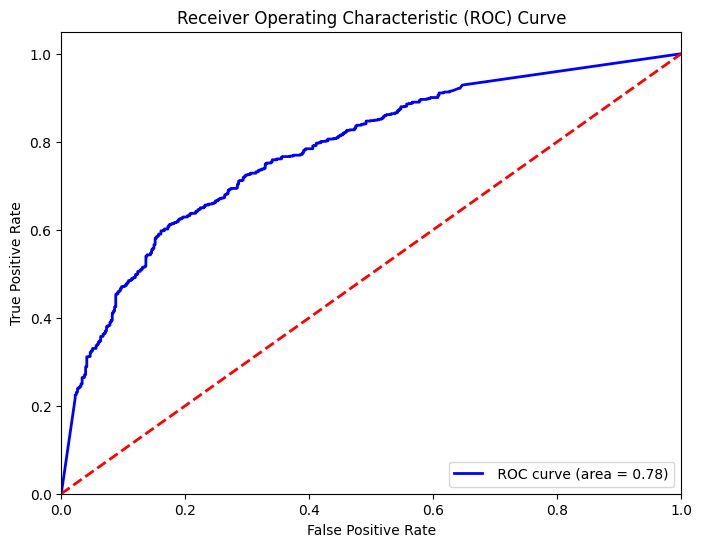

In [7]:
# Create and train the neural network
input_size = X_train.shape[1]
hidden_size = 4 # Number of neurons in the hidden layer
output_size = 1
learning_rate = 0.001
epochs = 1000

model4 = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)
model4.train(np.array(X_train), np.array(y_train), epochs)
predictions4 = np.array(model4.predict(X_valid))
print()
modelAnalyzer.printPrediction(predictions4, y_valid)
modelAnalyzer.plot_roc_auc(predictions4, y_valid)

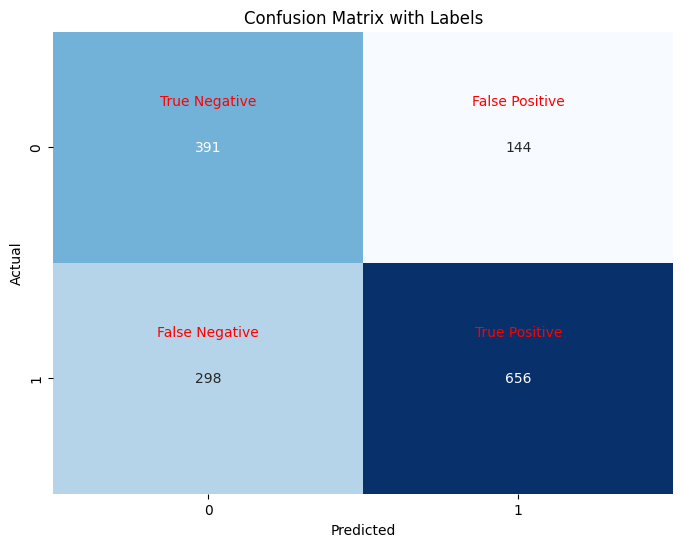

In [8]:
modelAnalyzer.plot(predictions4, y_valid)

### 16 Neuron Model Construction

Epoch 100, Loss: 0.5256
Epoch 200, Loss: 0.5184
Epoch 300, Loss: 0.5161
Epoch 400, Loss: 0.5149
Epoch 500, Loss: 0.5140
Epoch 600, Loss: 0.5138
Epoch 700, Loss: 0.5141
Epoch 800, Loss: 0.5144
Epoch 900, Loss: 0.5144
Epoch 1000, Loss: 0.5143

Accuracy: 0.7300201477501679
F1 Score: 0.7934224049331964
Precision: 0.7782258064516129
NPV: 0.6338028169014085
Recall: 0.8092243186582809
Specificity: 0.5887850467289719


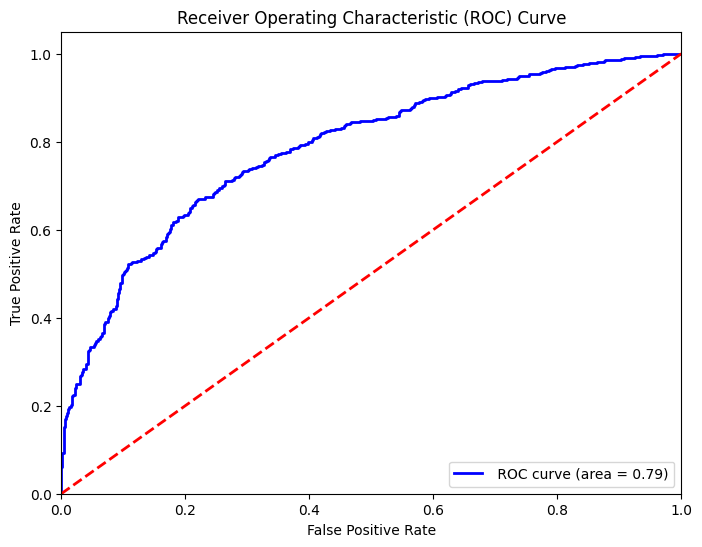

In [9]:
# Create and train the neural network
input_size = X_train.shape[1]
hidden_size = 16 # Number of neurons in the hidden layer
output_size = 1
learning_rate = 0.001
epochs = 1000

model16 = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)
model16.train(np.array(X_train), np.array(y_train), epochs)
predictions16 = np.array(model16.predict(X_valid))
print()
modelAnalyzer.printPrediction(predictions16, y_valid)
modelAnalyzer.plot_roc_auc(predictions16, y_valid)

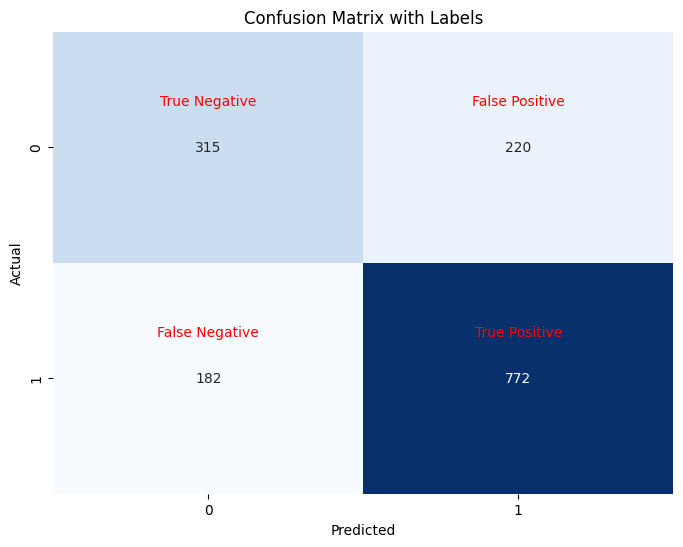

In [10]:
modelAnalyzer.plot(predictions16, y_valid)

### 32 Neuron Model Construction

Epoch 100, Loss: 0.5312
Epoch 200, Loss: 0.5173
Epoch 300, Loss: 0.5126
Epoch 400, Loss: 0.5105
Epoch 500, Loss: 0.5091
Epoch 600, Loss: 0.5077
Epoch 700, Loss: 0.5062
Epoch 800, Loss: 0.5048
Epoch 900, Loss: 0.5038
Epoch 1000, Loss: 0.5029

Accuracy: 0.7152451309603761
F1 Score: 0.7856420626895855
Precision: 0.7587890625
NPV: 0.6193548387096774
Recall: 0.8144654088050315
Specificity: 0.5383177570093458


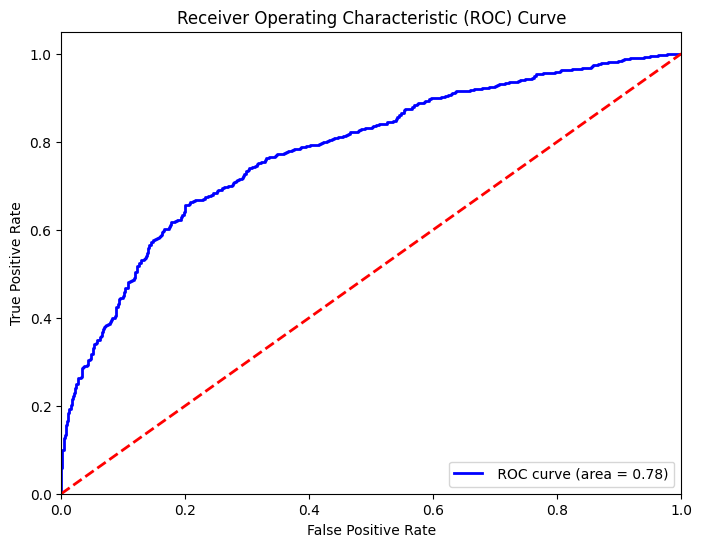

In [11]:
# Create and train the neural network
input_size = X_train.shape[1]
hidden_size = 32 # Number of neurons in the hidden layer
output_size = 1
learning_rate = 0.001
epochs = 1000

model32 = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)
model32.train(np.array(X_train), np.array(y_train), epochs)
predictions32 = np.array(model32.predict(X_valid))
print()
modelAnalyzer.printPrediction(predictions32, y_valid)
modelAnalyzer.plot_roc_auc(predictions32, y_valid)

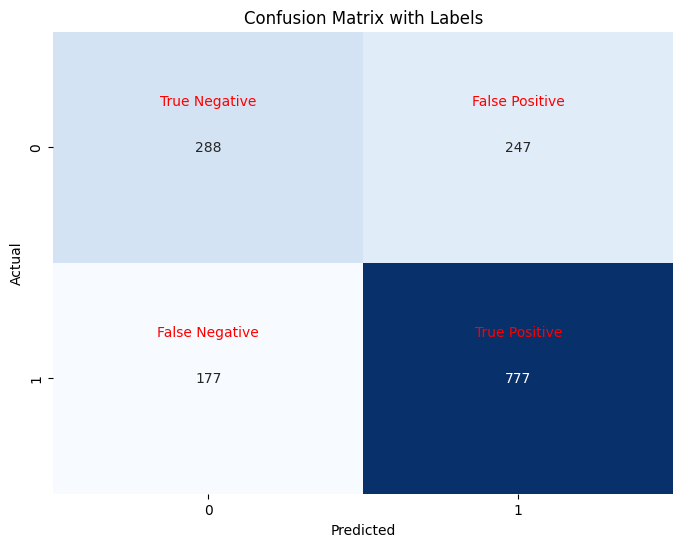

In [12]:
modelAnalyzer.plot(predictions32, y_valid)

### 0.002 Learning rate

Epoch 100, Loss: 0.5191
Epoch 200, Loss: 0.5135
Epoch 300, Loss: 0.5113
Epoch 400, Loss: 0.5103
Epoch 500, Loss: 0.5088
Epoch 600, Loss: 0.5073
Epoch 700, Loss: 0.5059
Epoch 800, Loss: 0.5085
Epoch 900, Loss: 0.5098
Epoch 1000, Loss: 0.5090

Accuracy: 0.7280053727333781
F1 Score: 0.8013732221677292
Precision: 0.7529953917050691
NPV: 0.6608910891089109
Recall: 0.8563941299790356
Specificity: 0.49906542056074765


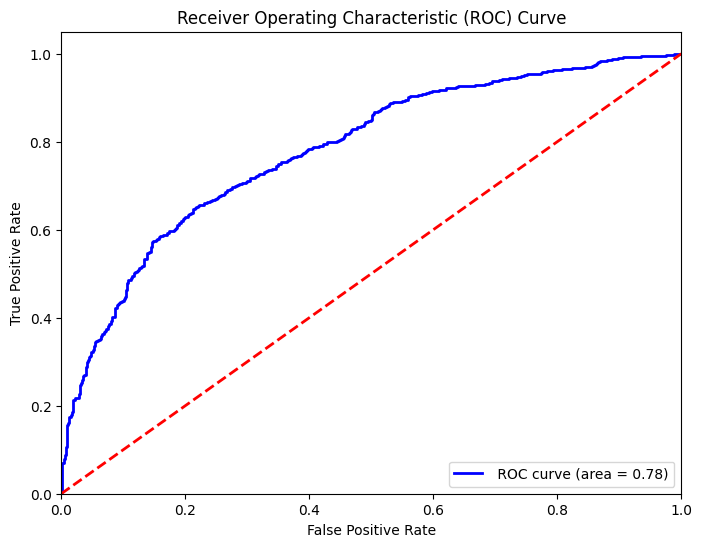

In [13]:
# Create and train the neural network
input_size = X_train.shape[1]
hidden_size = 32 # Number of neurons in the hidden layer
output_size = 1
learning_rate = 0.002
epochs = 1000

model002 = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)
model002.train(np.array(X_train), np.array(y_train), epochs)
predictions002 = np.array(model002.predict(X_valid))
print()
modelAnalyzer.printPrediction(predictions002, y_valid)
modelAnalyzer.plot_roc_auc(predictions002, y_valid)

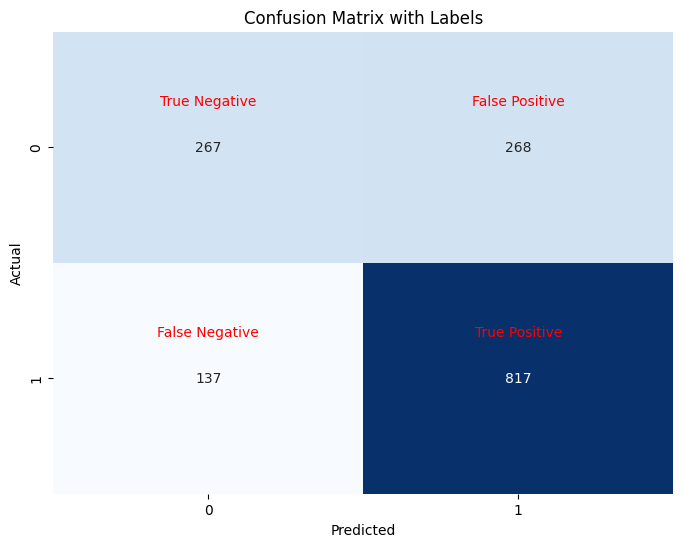

In [14]:
modelAnalyzer.plot(predictions002, y_valid)

### 0.0005 Learning rate

Epoch 100, Loss: 0.5424
Epoch 200, Loss: 0.5262
Epoch 300, Loss: 0.5196
Epoch 400, Loss: 0.5166
Epoch 500, Loss: 0.5146
Epoch 600, Loss: 0.5133
Epoch 700, Loss: 0.5123
Epoch 800, Loss: 0.5116
Epoch 900, Loss: 0.5110
Epoch 1000, Loss: 0.5105

Accuracy: 0.738079247817327
F1 Score: 0.8028311425682507
Precision: 0.775390625
NPV: 0.6559139784946236
Recall: 0.8322851153039832
Specificity: 0.5700934579439252


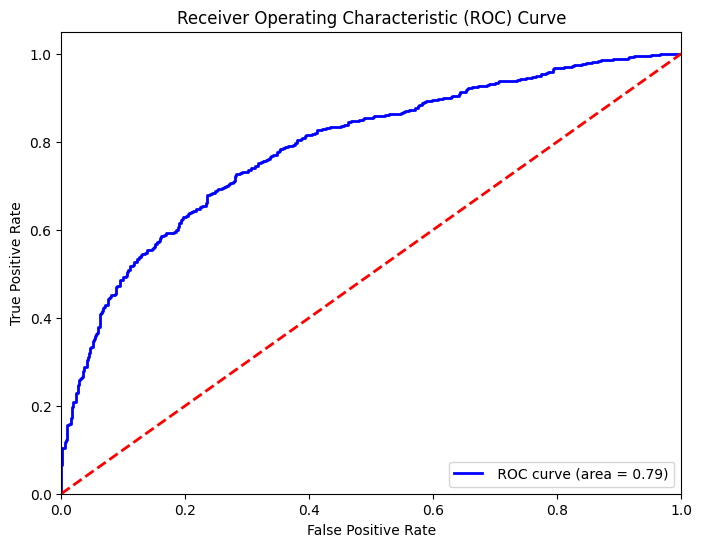

In [15]:
# Create and train the neural network
input_size = X_train.shape[1]
hidden_size = 32 # Number of neurons in the hidden layer
output_size = 1
learning_rate = 0.0005
epochs = 1000

model0005 = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)
model0005.train(np.array(X_train), np.array(y_train), epochs)
predictions0005 = np.array(model0005.predict(X_valid))
print()
modelAnalyzer.printPrediction(predictions0005, y_valid)
modelAnalyzer.plot_roc_auc(predictions0005, y_valid)

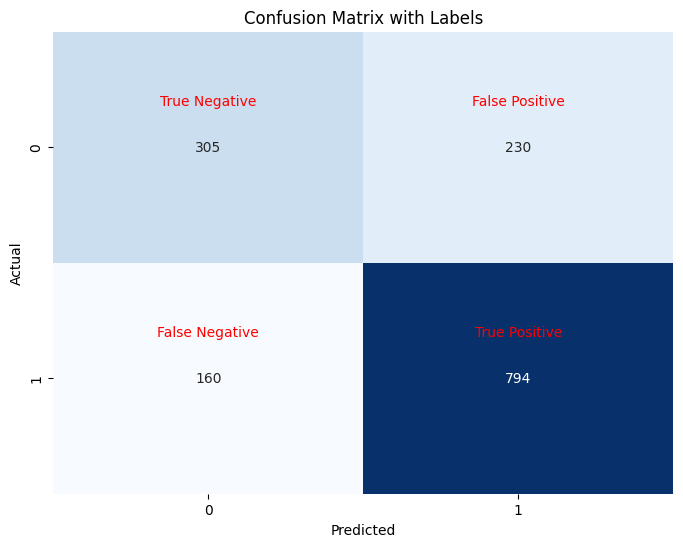

In [16]:
modelAnalyzer.plot(predictions0005, y_valid)

### 2000 iterations, 0.0003 Learning Rate

Epoch 100, Loss: 0.5775
Epoch 200, Loss: 0.5514
Epoch 300, Loss: 0.5361
Epoch 400, Loss: 0.5269
Epoch 500, Loss: 0.5210
Epoch 600, Loss: 0.5172
Epoch 700, Loss: 0.5145
Epoch 800, Loss: 0.5124
Epoch 900, Loss: 0.5107
Epoch 1000, Loss: 0.5092
Epoch 1100, Loss: 0.5079
Epoch 1200, Loss: 0.5068
Epoch 1300, Loss: 0.5058
Epoch 1400, Loss: 0.5049
Epoch 1500, Loss: 0.5041
Epoch 1600, Loss: 0.5033
Epoch 1700, Loss: 0.5027
Epoch 1800, Loss: 0.5021
Epoch 1900, Loss: 0.5016
Epoch 2000, Loss: 0.5011

Accuracy: 0.7300201477501679
F1 Score: 0.7967644084934278
Precision: 0.76953125
NPV: 0.6430107526881721
Recall: 0.8259958071278826
Specificity: 0.5588785046728972


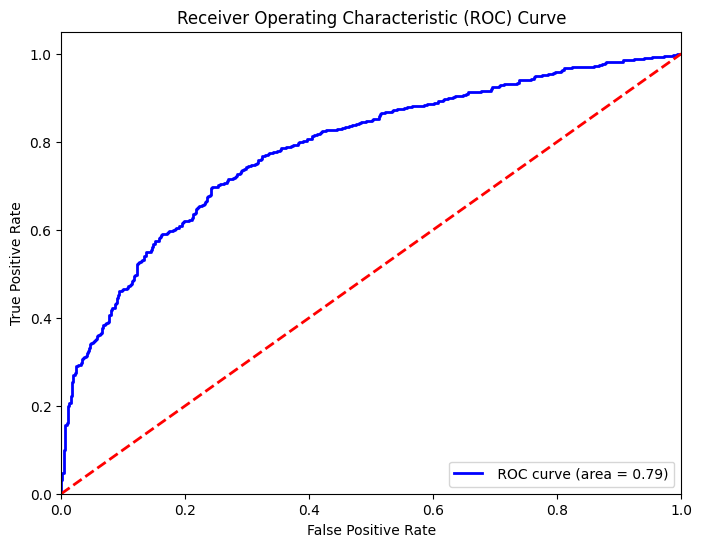

In [17]:
# Create and train the neural network
input_size = X_train.shape[1]
hidden_size = 32 # Number of neurons in the hidden layer
output_size = 1
learning_rate = 0.0003
epochs = 2000

model2000 = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)
model2000.train(np.array(X_train), np.array(y_train), epochs)
predictions2000 = np.array(model2000.predict(X_valid))
print()
modelAnalyzer.printPrediction(predictions2000, y_valid)
modelAnalyzer.plot_roc_auc(predictions2000, y_valid)

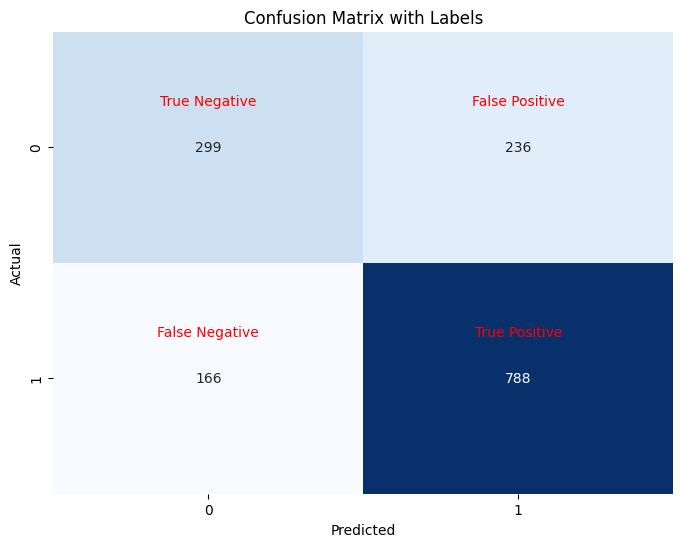

In [18]:
modelAnalyzer.plot(predictions2000, y_valid)

### COMBINE EVERYTHING! 128 Neurons, 0.0005 Learning Rate, 1500 Iterations

Epoch 100, Loss: 0.8966
Epoch 200, Loss: 0.7012
Epoch 300, Loss: 0.6363
Epoch 400, Loss: 0.5856
Epoch 500, Loss: 0.5451
Epoch 600, Loss: 0.5184
Epoch 700, Loss: 0.5027
Epoch 800, Loss: 0.4934
Epoch 900, Loss: 0.4878
Epoch 1000, Loss: 0.4843
Epoch 1100, Loss: 0.4818
Epoch 1200, Loss: 0.4798
Epoch 1300, Loss: 0.4780
Epoch 1400, Loss: 0.4762
Epoch 1500, Loss: 0.4745

Accuracy: 0.7192746809939556
F1 Score: 0.7907907907907908
Precision: 0.7567049808429118
NPV: 0.6314606741573033
Recall: 0.8280922431865828
Specificity: 0.525233644859813


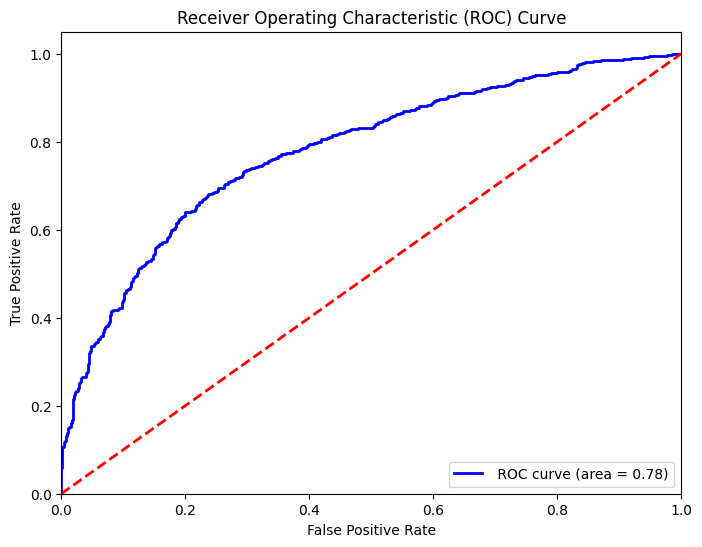

In [20]:
# Create and train the neural network
input_size = X_train.shape[1]
hidden_size = 128 # Number of neurons in the hidden layer
output_size = 1
learning_rate = 0.0005
epochs = 1500

modelBIG = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)
modelBIG.train(np.array(X_train), np.array(y_train), epochs)
predictionsBIG = np.array(modelBIG.predict(X_valid))
print()
modelAnalyzer.printPrediction(predictionsBIG, y_valid)
modelAnalyzer.plot_roc_auc(predictionsBIG, y_valid)

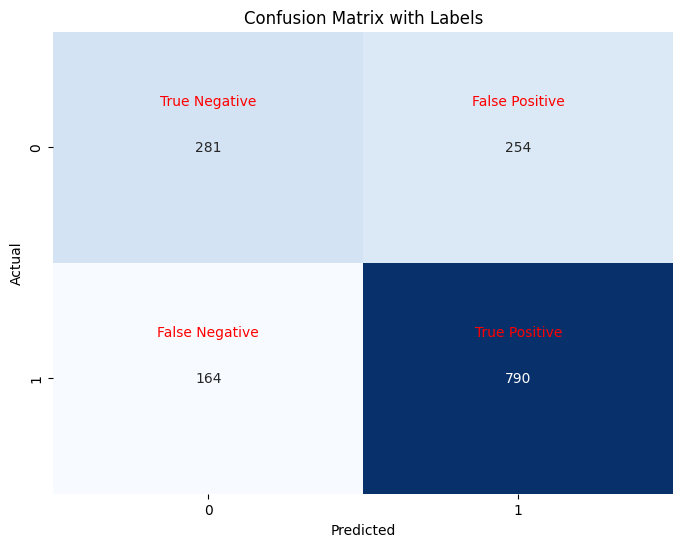

In [21]:
modelAnalyzer.plot(predictionsBIG, y_valid)

### Make the Model have a Higher (recall/specificity ratio) with Youden index

In [24]:
best_threshold = modelAnalyzer.youdenIndex(predictions0005, y_valid)
modelAnalyzer.printPrediction(predictions0005, y_valid, threshold=best_threshold)

Model Logistic Regression: Best Threshold = 0.613, Youden Index = 0.444
Accuracy: 0.7233042310275353
F1 Score: 0.7708565072302558
Precision: 0.8210900473933649
NPV: 0.5953488372093023
Recall: 0.7264150943396226
Specificity: 0.7177570093457943


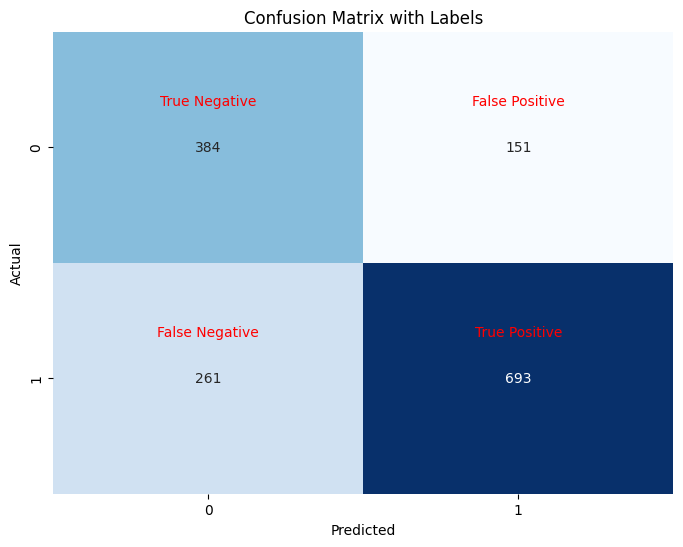

In [25]:
modelAnalyzer.plot(predictions0005, y_valid, threshold=best_threshold)

### Test Model on Test Data

Epoch 100, Loss: 0.4999
Epoch 200, Loss: 0.4717
Epoch 300, Loss: 0.4630
Epoch 400, Loss: 0.4587
Epoch 500, Loss: 0.4565
Epoch 600, Loss: 0.4553
Epoch 700, Loss: 0.4548
Epoch 800, Loss: 0.4547
Epoch 900, Loss: 0.4551
Epoch 1000, Loss: 0.4556

Accuracy: 0.7320349227669577
F1 Score: 0.8043158410985778
Precision: 0.7543698252069917
NPV: 0.6716417910447762
Recall: 0.8613445378151261
Specificity: 0.5027932960893855


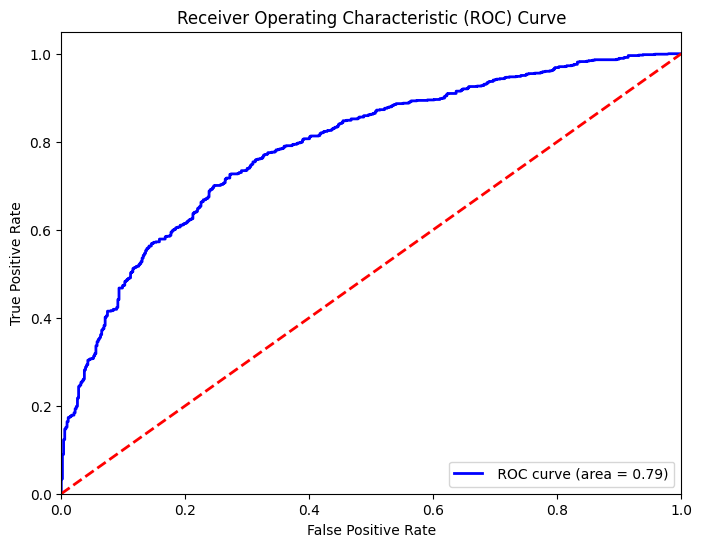

In [33]:
# Create and train the neural network
input_size = X_train.shape[1]
hidden_size = 32 # Number of neurons in the hidden layer
output_size = 1
learning_rate = 0.0005
epochs = 1000

model0005Test = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)
model0005Test.train(np.array(X_train_split), np.array(y_train_split), epochs)
predictions0005Test = np.array(model0005Test.predict(X_test))
print()
modelAnalyzer.printPrediction(predictions0005Test, y_test)
modelAnalyzer.plot_roc_auc(predictions0005Test, y_test)

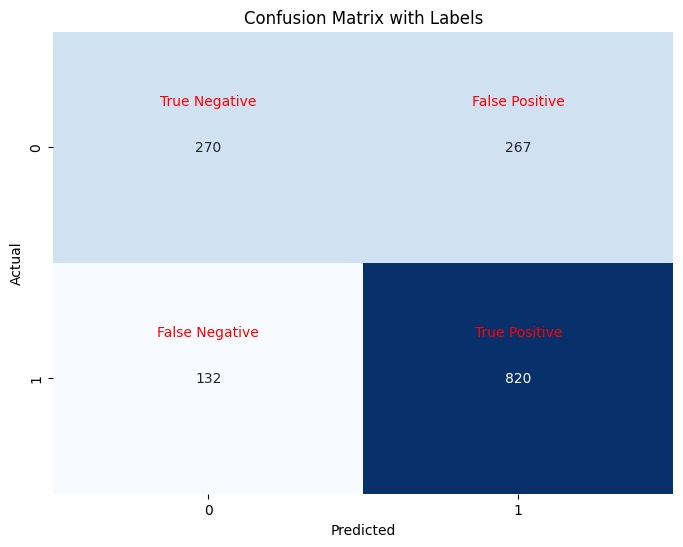

In [34]:
modelAnalyzer.plot(predictions0005Test, y_test)

---

# NOTE 
This is not a part of the submission, i was just testing multiple activation functions here.

In [176]:
import tensorflow as tf

# Define a simple neural network
model = tf.keras.Sequential([
    # tf.keras.layers.Dense(64, activation='sigmoid', input_shape=(4044,)),
    # tf.keras.layers.Dense(64, activation='relu', input_shape=(4044,)),
    # tf.keras.layers.Dense(64, activation='softmax', input_shape=(4044,)),
    # tf.keras.layers.Dense(64, activation='elu', input_shape=(4044,)),
    # tf.keras.layers.Dense(64, activation='softplus', input_shape=(4044,)),
    # tf.keras.layers.Dense(64, activation='LeakyReLU', input_shape=(4044,)),
    # tf.keras.layers.Dense(64, activation='tanh', input_shape=(4044,)),
    # tf.keras.layers.Dense(64, activation='linear', input_shape=(4044,)),
    # tf.keras.layers.Dense(64, activation='exponential', input_shape=(4044,)),
    # tf.keras.layers.Dense(64, activation='softsign', input_shape=(4044,)),
    # tf.keras.layers.Dense(64, activation='hard_sigmoid', input_shape=(4044,)),
    # tf.keras.layers.Dense(64, activation='swish', input_shape=(4044,)),
    tf.keras.layers.Dense(64, activation='gelu', input_shape=(4044,)),
    # tf.keras.layers.Dense(64, activation='relu6', input_shape=(4044,)),
    tf.keras.layers.Dense(10, activation='sigmoid')
    # tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(X_train, y_train, epochs=2, validation_data=(X_valid, y_valid))

test_loss, test_acc = model.evaluate(X_valid, y_valid)
print(test_acc)


Epoch 1/2
187/187 [==============================] - 1s 4ms/step - loss: 1.0774 - accuracy: 0.6806 - val_loss: 0.5662 - val_accuracy: 0.7327
Epoch 2/2
47/47 [==============================] - 0s 2ms/step - loss: 0.5498 - accuracy: 0.7314
0.7313633561134338
